# 0.0. __INIT__

## 0.1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

## 0.2. Load Dataset

In [2]:
df_raw = pd.read_csv('../data/raw/train.csv')

## 0.3. Helper Functions

In [3]:
def numerical_description(numerical: pd.DataFrame) -> pd.DataFrame:
    description = numerical.describe().T
    description['range'] = description['max'] - description['min']
    description['skew'] = numerical.skew()
    description['kurtosis'] = numerical.kurtosis()

    return description

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

In [5]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1. Data Dimension

In [6]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


## 1.2. Data types

In [7]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 1.4. Data Descriptive

In [9]:
numerical = df1.select_dtypes(include=['int64', 'float64'])
categorical = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [10]:
numerical_description(numerical)

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0,381108.0,9.443274e-16,-1.200000
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0,65.0,6.725390e-01,-0.565655
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0,1.0,-2.159518e+01,464.354302
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0,52.0,-1.152664e-01,-0.867857
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0,1.0,1.677471e-01,-1.971871
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0,537535.0,1.766087e+00,34.004569
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0,162.0,-9.000081e-01,-0.970810
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0,289.0,3.029517e-03,-1.200688
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0,1.0,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

In [12]:
df2.columns = [column.lower() for column in df2.columns]

In [13]:
df2['vehicle_age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [14]:
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'yes' else 0)
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,0,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,0,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


# 3.0. Data Filtering

In [15]:
df3 = df2.copy()

# 4.0. EDA

In [16]:
df4 = df3.copy()

## 4.1. Univariate Analysis

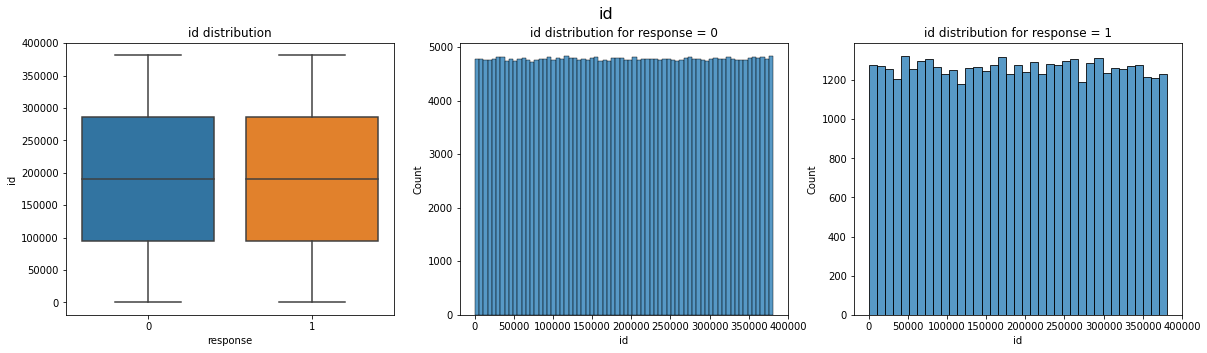

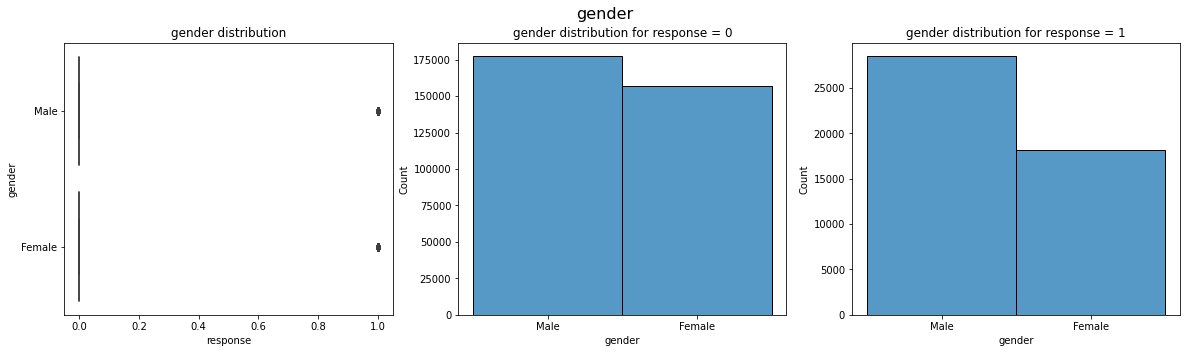

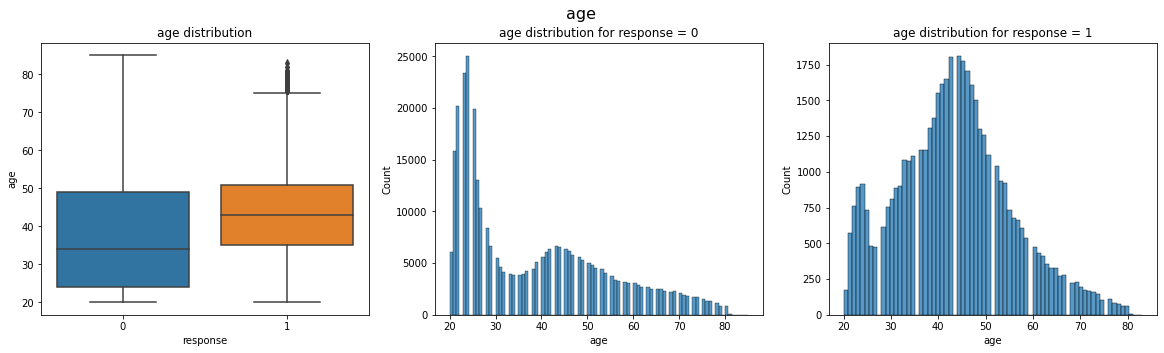

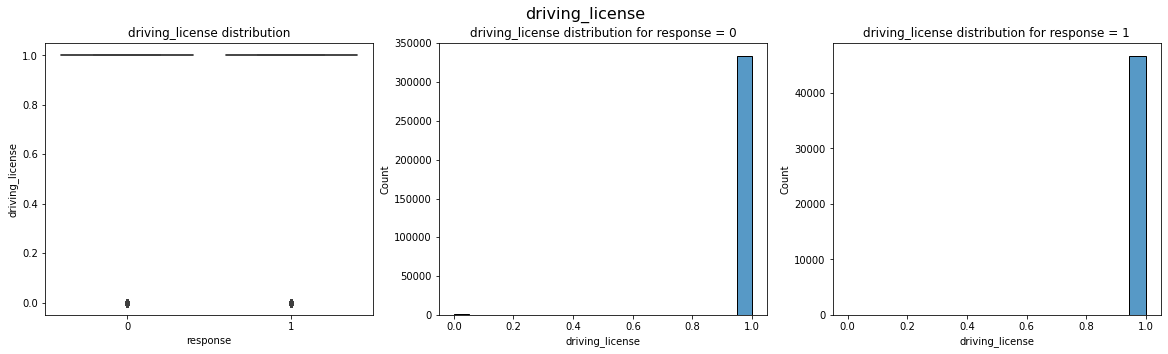

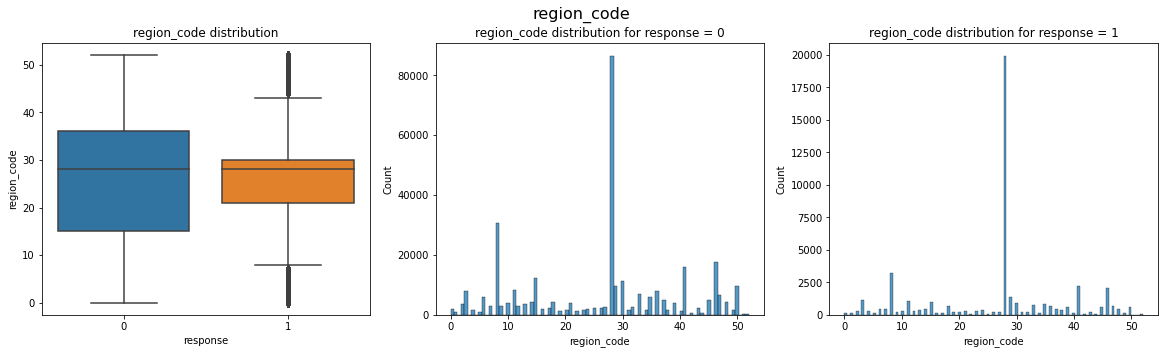

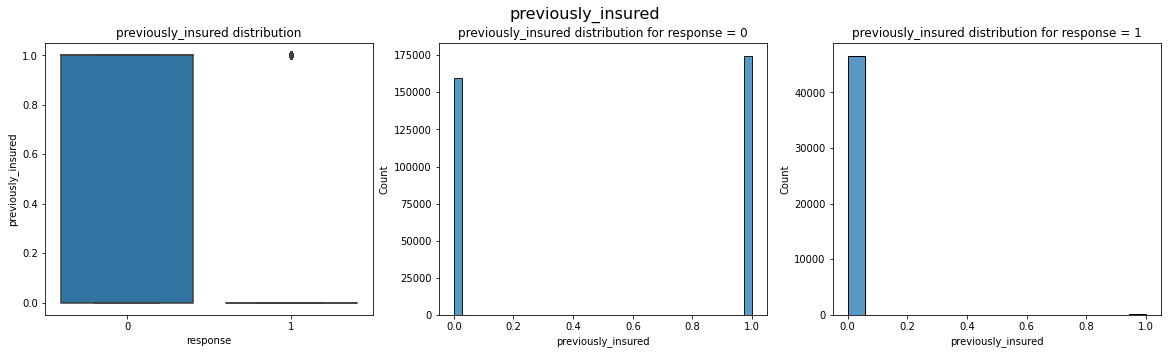

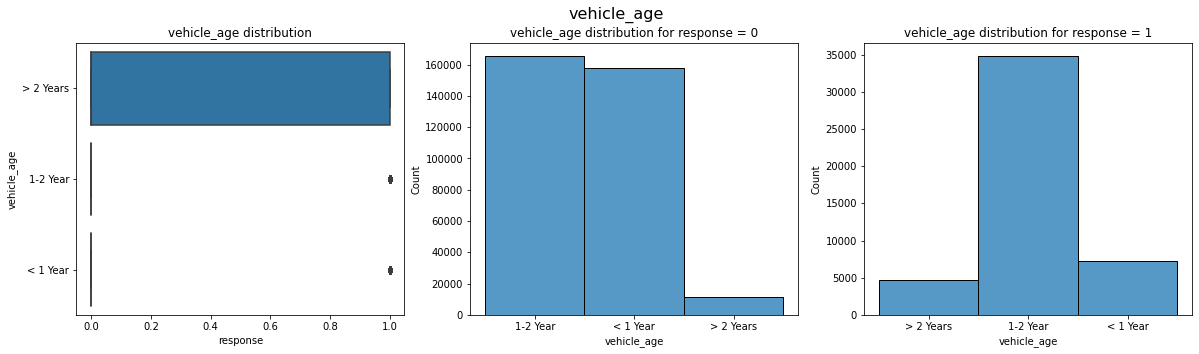

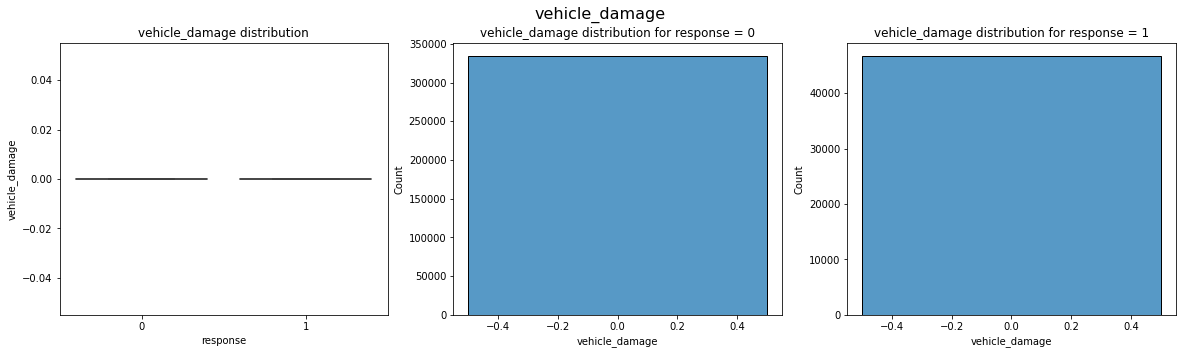

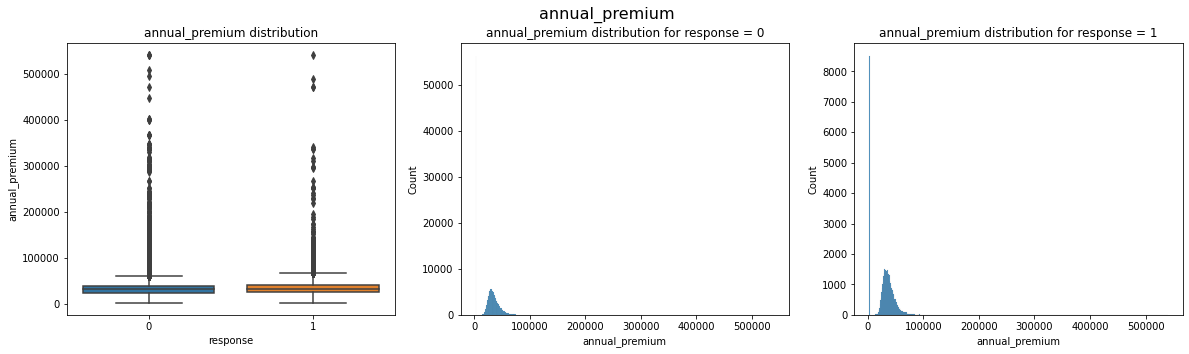

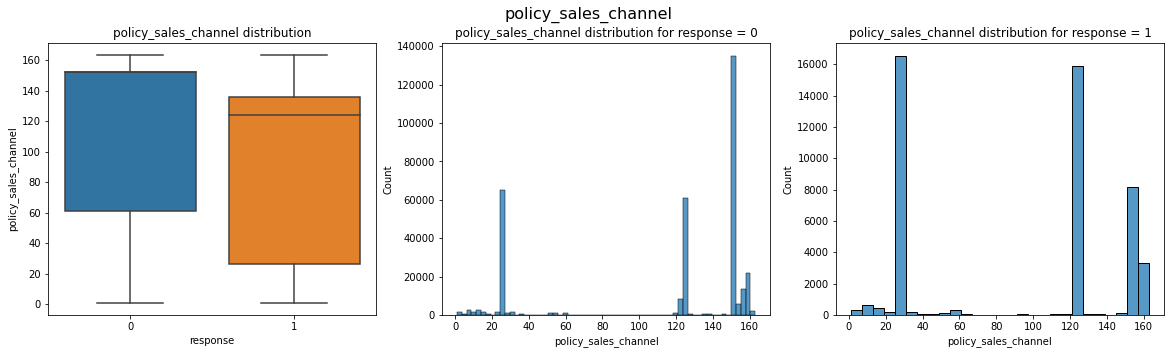

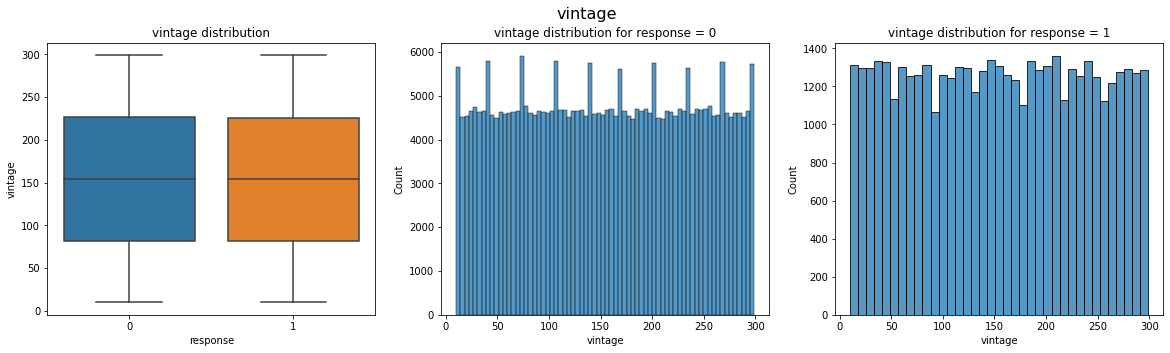

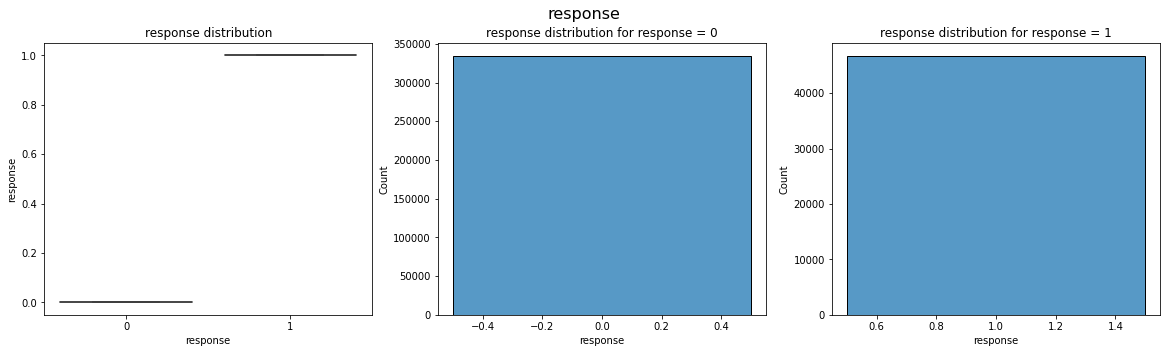

In [17]:
for variable in df4.columns:
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(f'{variable}', fontsize=16)
    
    sns.boxplot(x='response', y=variable, data=df4, ax=axs[0])
    axs[0].set_title(f'{variable} distribution')

    sns.histplot(df4.loc[df4['response'] == 0, variable], ax=axs[1])
    axs[1].set_title(f'{variable} distribution for response = 0')

    sns.histplot(df4.loc[df4['response'] == 1, variable], ax=axs[2])
    axs[2].set_title(f'{variable} distribution for response = 1')

    plt.show()


In [18]:
# Drive liscence

Text(0.5, 1.0, 'Response = 0')

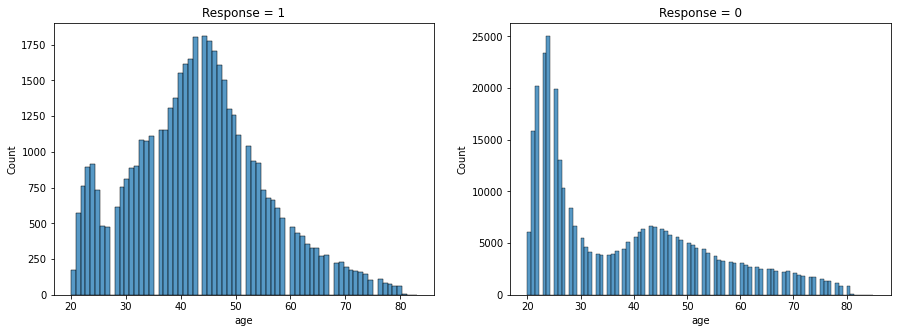

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df4.loc[df4['response'] == 1, 'age'], ax=axs[0])
sns.histplot(df4.loc[df4['response'] == 0, 'age'], ax=axs[1])
axs[0].set_title('Response = 1')
axs[1].set_title('Response = 0')

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

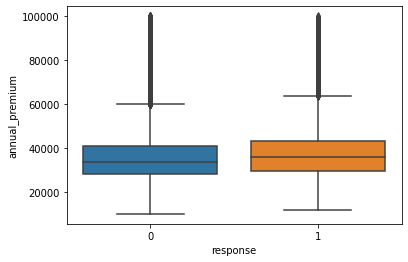

In [20]:
# annual_premium
sns.boxplot(x='response', y='annual_premium', data=df4[(df4['annual_premium'] > 10e3) & (df4['annual_premium'] < 10e4)])

Text(0.5, 1.0, 'Response = 0')

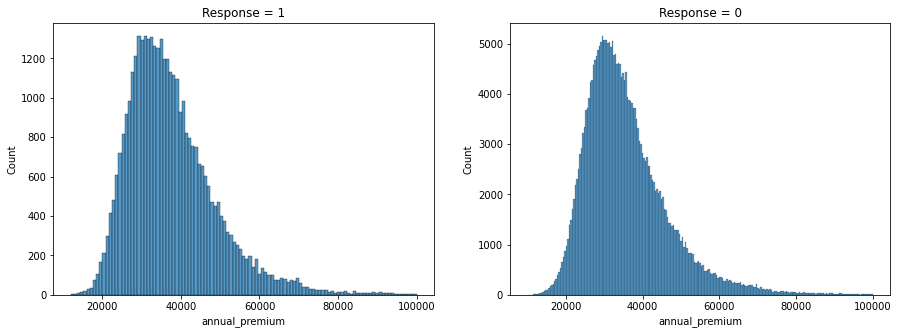

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df4.loc[(df4['response'] == 1) & (df4['annual_premium'] > 10e3) & (df4['annual_premium'] < 10e4), 'annual_premium'], ax=axs[0])
sns.histplot(df4.loc[(df4['response'] == 0) & (df4['annual_premium'] > 10e3) & (df4['annual_premium'] < 10e4), 'annual_premium'], ax=axs[1])
axs[0].set_title('Response = 1')
axs[1].set_title('Response = 0')

<AxesSubplot:xlabel='response'>

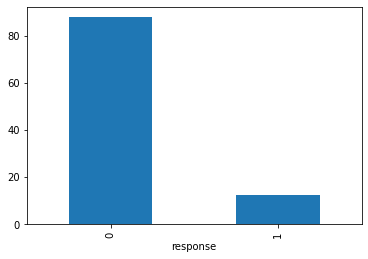

In [22]:
# Driving license

aux = df4[['driving_license', 'response']].groupby(['response']).sum()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum() * 100
aux['driving_license_perc'].plot.bar()

<AxesSubplot:xlabel='region_code', ylabel='id'>

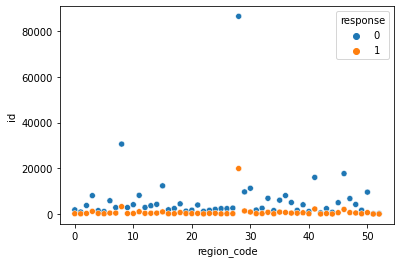

In [23]:
# Region Code
aux = df4[['id', 'region_code', 'response']].groupby(['response', 'region_code']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue= 'response', data=aux)

<AxesSubplot:xlabel='previously_insured'>

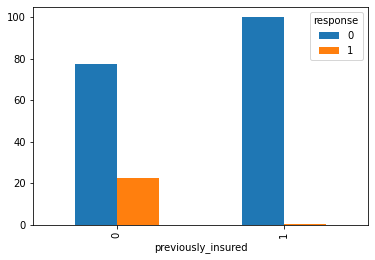

In [24]:
# Previously_insured
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x / x.sum() * 100, axis=1).plot.bar()

<AxesSubplot:xlabel='vehicle_age'>

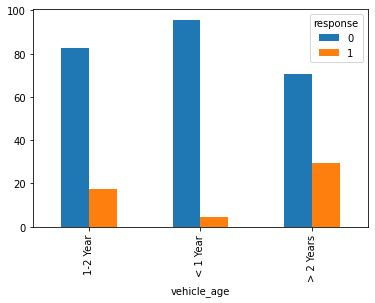

In [25]:
# Vehicle_age
pd.crosstab(df4['vehicle_age'], df4['response']).apply(lambda x: x / x.sum() * 100, axis=1).plot.bar()

In [26]:
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,1-2 Year,0,0.434285
1,< 1 Year,0,0.413488
2,1-2 Year,1,0.091328
3,> 2 Years,0,0.029663
4,< 1 Year,1,0.018897
5,> 2 Years,1,0.012338


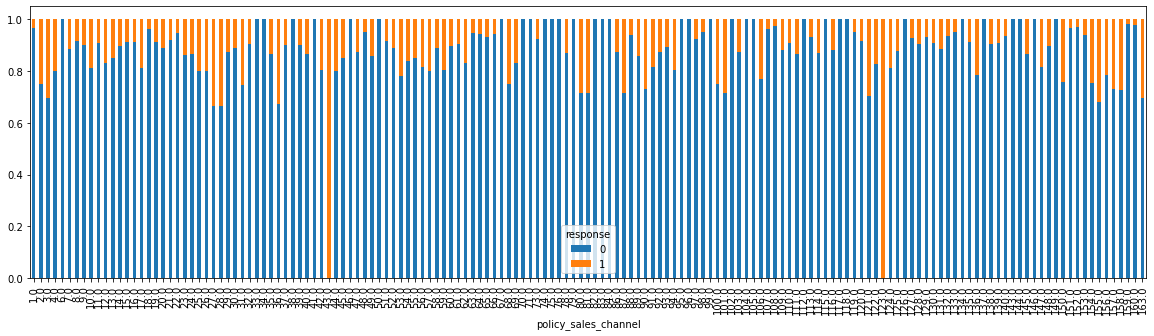

In [27]:
# policy_sales_channel
aux = pd.crosstab(index=df4['policy_sales_channel'], columns=df4['response'], normalize='index')
aux.plot(kind='bar', stacked=True, figsize=(20, 5));

# 5.0. Data Preparation

In [58]:
df5 = df4.copy()

In [59]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=.20)
df5 = pd.concat([x_train, y_train], axis=1)

## 5.1. Standardization

In [60]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

## 5.2. Rescaling

In [61]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

In [62]:
# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

In [63]:
# vintage
df5['vintage'] = mms_age.fit_transform(df5[['vintage']].values)

## 5.3. Encoder

In [64]:
# Possibilities:
# - One Hot Encoding (1 or 0) (or get dummies from pandas - this one is better)
# - Label Encoding
# - Order Encoding
# - Frequency Encoding (how many driving_license per class)
# - Target Encoding (average of total of driving licenses)
# - Weighted Target Encoding (For one given weight, calculates the distance average)
# Note: When there is more than 6-7 categories, do not use One Hot Encoding. Too much increasing on the df dimensions. Will need much more data from category.

In [65]:
# driving_license -> already encodded (1 or 0)

# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby('gender')['response'].mean()
df5['gender'] = df5['gender'].map(target_encode_gender)

# region_code -> Frequency Encoding / Target Encoding / Weighted Target Encoding
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5['region_code'] = df5['region_code'].map(target_encode_region_code)

# previously_insured -> One Hot Encoding / Order Encoding / Frequency Encoding
# # Attention on the risks of comparing those groups from the variable

# vehicle_age -> One Hot Encoding
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

# vehicle_damage

# policy_sales_channel -> Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5['policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)

## 5.4. Validation Preparation

In [66]:
# annual_premium
x_validation['annual_premium'] = ss.fit_transform(x_validation[['annual_premium']].values)

# age
x_validation['age'] = mms_age.fit_transform(x_validation[['age']].values)

# vintage
x_validation['vintage'] = mms_age.fit_transform(x_validation[['vintage']].values)

# gender
x_validation['gender'] = x_validation['gender'].map(target_encode_gender)

# region_code
x_validation['region_code'] = x_validation['region_code'].map(target_encode_region_code)

# vehicle_age -> One Hot Encoding
x_validation = pd.get_dummies(x_validation, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel -> Target Encoding / Frequency Encoding
x_validation['policy_sales_channel'] = x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# Fill NA
x_validation = x_validation.fillna(0)

# 6.0. Feature Selection

## 6.1. Boruta

## 6.2. Features Importancia

In [38]:
# model definition
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=1)

# data preparation
x_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=1, random_state=0)

In [39]:
importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]

df = pd.DataFrame()
for ii, jj in zip(x_train_n, importances):
    aux = pd.DataFrame({'feature': ii, 'importance': jj}, index=[0])
    df = pd.concat([df, aux], axis=0)

Feature ranking:
                 feature  importance
0                vintage    0.279625
0         annual_premium    0.252526
0                    age    0.166698
0            region_code    0.107529
0     previously_insured    0.097494
0   policy_sales_channel    0.063865
0   vehicle_age_< 1 Year    0.015550
0   vehicle_age_1-2 Year    0.008354
0                 gender    0.004509
0  vehicle_age_> 2 Years    0.003391
0        driving_license    0.000457
0         vehicle_damage    0.000000


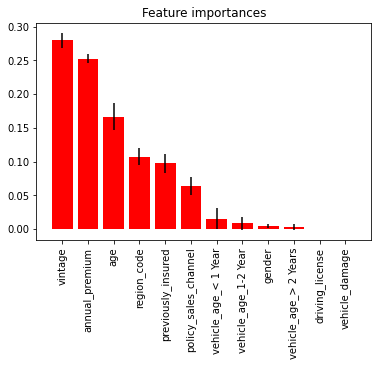

In [40]:
# Print the feature ranking
print('Feature ranking:')
print(df.sort_values('importance', ascending=False))
plt.figure()
plt.title('Feature importances')
plt.bar(
    range(x_train_n.shape[1]),
    importances[indices],
    color='r',
    yerr=std[indices],
    align='center'
)
plt.xticks(range(x_train_n.shape[1]), x_train_n.columns[indices], rotation=90)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()          

# 7.0. Machine Learning

In [67]:
cols_selected = [
    'vintage', 'annual_premium', 'age', 'region_code', 'vehicle_damage',
    'policy_sales_channel', 'previously_insured'
]

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]

## 7.1. KNN

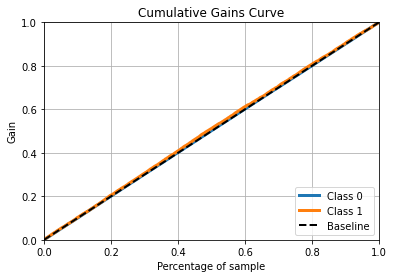

In [68]:
# Model Definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

# Model training
knn_model.fit(x_train, y_train)

# Model prediction - Generalization power
yhat_knn = knn_model.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn);

## 7.2. Logistic Regression

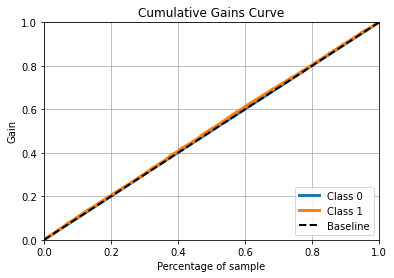

In [69]:
# Model Definition
lr_model = lm.LogisticRegression(random_state=42)

# Model training
lr_model.fit(x_train, y_train)

# Model prediction - Generalization power
yhat_lr = lr_model.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr);

## 7.3. Extra Trees

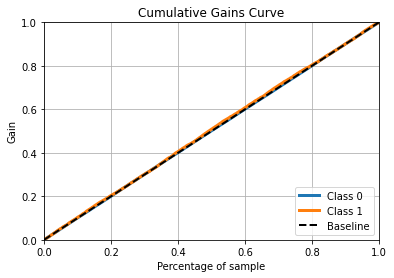

In [70]:
# Model Definition
et_model = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# Model training
et_model.fit(x_train, y_train)

# Model prediction - Generalization power
yhat_et = et_model.predict_proba(x_val)

# Accumulative gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_et);

# 8.0. Model Performance

In [71]:
df8 = x_validation.copy()

In [72]:
df8.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years
322408,322409,0.138486,0.030769,1,0.074074,1,0,0.351753,0.057120,0.124567,0,1,0
34502,34503,0.104094,0.107692,1,0.188206,0,0,0.747629,0.353498,0.089965,0,1,0
369420,369421,0.138486,0.846154,1,0.115261,1,0,-1.658184,0.209035,0.723183,1,0,0
79746,79747,0.104094,0.446154,1,0.093325,0,0,-1.658184,0.209035,0.519031,1,0,0
264820,264821,0.104094,0.107692,1,0.145768,0,0,-1.658184,0.353498,0.878893,0,1,0
